## Exemplo 12.3

- Suponhe que queremos transformar uma variável aleatória uniforme em uma variável aleatória exponencial com a FDP na forma:	 $$f_Y(y)=a\exp(-ay)u(y) $$
- A FDC correspondente é:
	 $$F_Y(y)=[1-\exp(-ay)]u(y) $$
- Então, para transformar uma variável aleatória uniforme em um v.as. exponencial, podemos usar a transformação:
	 $$Y=F_Y^{-1}=-\frac{\ln(1-X)}a $$
- Note que, se $X$ é uniformemente distribuído em (0,1), então $1-X$ serão também uniformemente distribuídos e isso permite uma transformação mais simples:
	 $$Y=-\frac{\ln (X)}a $$

## Atividade 3.1

- Refaça o exemplo 12.3 e gere $1000$ v.as. exponenciais e faça um histograma da v.a. 

In [24]:
def expon_pdf(x, a=1):
    """FDP da distribuição exponencial."""
    return a*np.exp(-a*x)


In [25]:

def expon_cdf(x, a=1):
    """FCD da distribuição exponencial."""
    return 1 - np.exp(-a*x)

In [28]:
def expon_icdf(p, a=1):
    """FCD Inversa da distribuição exponencial."""
    return -np.log(1-p)/a

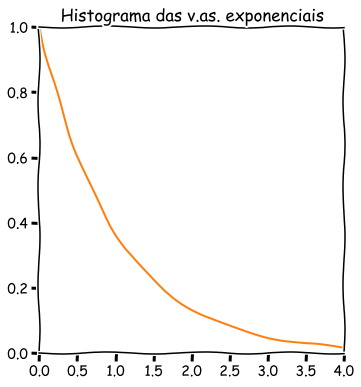

In [39]:
import scipy.stats as stats

dist = stats.expon()
x = np.linspace(0,4,100)
y = np.linspace(0,1,100)

with plt.xkcd():
    plt.figure(figsize=(12,6))
    #plt.subplot(121)
    #plt.plot(x, expon_cdf(x))
    #plt.axis([0, 4, 0, 1])
    #for q in [0.5, 0.8]:
        #plt.arrow(0, q, expon_icdf(q)-0.1, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
        #plt.arrow(expon_icdf(q), q, 0, -q+0.1, head_width=0.1, head_length=0.05, fc='b', ec='b')
    #plt.ylabel('1: Generate a (0,1) uniform PRNG')
    #plt.xlabel('2: Find the inverse CDF')
    #plt.title('Método de Transformação Inversa');

    plt.subplot(122)
    u = np.random.random(10000)
    v = expon_icdf(u)
    plt.hist(v, histtype='step', bins=100, linewidth=2)
    plt.plot(x, expon_pdf(x), linewidth=2)
    plt.axis([0,4,0,1])
    plt.title('Histograma das v.as. exponenciais');


- O método da transformação não funciona para geração de v.as. gaussianas pois não temos uma expressão fechada para $F_X ^{−1} (U)$. Um método eficiente para gerar v.as. gaussianas faz uso de duas v.as. uniformes independentes $U_1$ e $U_2$ da seguinte forma:
	- $$X_1=\sqrt{-2\ln(U_1)}\cos(2\pi U_2) $$
- e
	- $$X_2=\sqrt{-2\ln(U_1)}\sin(2\pi U_2) $$
- $X_1$ e $X_2$ são v.as. gaussinas com variância unitária e esperança nula $N(0, 1)$.
-  Para gerar uma v.a. gaussiana $Y_i$ com $N(\sigma^2,\mu)$ faça a $Y_i=\sigma X_i+\mu$, $i=1,2$

## Atividade 3.2

- Gere $1000$ amostras de $X_1$ e faça um histograma da mesma.

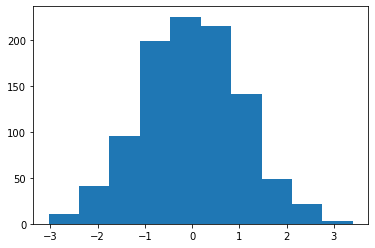

In [40]:

from numpy import random, sqrt, log, sin, cos, pi
from pylab import show,hist,subplot,figure

# Função de Transformação
def gaussian(u1,u2):
  X1 = sqrt(-2*log(u1))*cos(2*pi*u2)
  X2 = sqrt(-2*log(u1))*sin(2*pi*u2)
  return X1,X2

# Valores uniformemente distribuídos entre 0 e 1
u1 = random.rand(1000)
u2 = random.rand(1000)

# Rodando a transformação
X1,X2 = gaussian(u1,u2)

# Plotando os valores
figure()
hist(X1)     # o histograma de X1
show()